# Week 2: Finite automata

# Tuesday

<div class="alert alert-info">
    <p><b>Read</b> 1.1.</p>
    <p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=97d9cd91-3407-4c26-a5ed-abff01614501">W2E1: Deterministic Finite Automata</a>.</p>
</div>

## Deterministic finite automata

In the first class, I said that we would study a sequence of kinds of "computers" leading up to Turing machines. Today we'll look at the simplest of these, finite automata, which are only allowed to make a single left-to-right pass through the input.

- The machine is fed an input string.
- At each time step, it reads one symbol and moves one symbol to the right.
- It has only a finite number of states (another way of saying this: it uses only $O(1)$ memory).
- When it reaches the end of the string, it decides whether to accept or reject the string.

Sipser uses an automatic door to illustrate a finite automaton. (The door is the type that swings open toward the rear, not the type that slides open.) This example is good because its state is something visible. But this automaton doesn't have accept states, because the input string has no end and the automaton's job is not to accept or reject strings. So the door is best thought of as an analogy more than a strict example.

### By example

Let's look at an example DFA, the book's $M_1$. In lecture notes I'll be using a toolkit called [Tock], which displays and runs automata inside Jupyter notebooks. You are welcome to use it to tinker with automata or to write your homework assignments.

[Tock]: https://github.com/ND-CSE-30151/tock

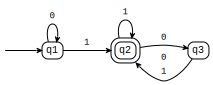

In [1]:
from tock import *
m1 = read_csv('dfa-m1.csv')
to_graph(m1)

Viewed this way, the nodes are _states_ and the edges are _transitions_. At any given time, the DFA is "in" one of its states. It starts in the _start_ state $q_1$, indicated by the arrow from nowhere. It reads in a string (say, `1101`), and for each symbol, it follows the transition (edge) labeled with that symbol. When it reaches the end of the string, if it is in an _accept_ state (indicated by the double circle, which is supposed to look like a bullseye), it accepts the string. Otherwise, it rejects the string. We can visualize this like so:

In [2]:
run(m1, "1 1 0 1").only_path()

q1,[1] 1 0 1
q2,[1] 0 1
q2,[0] 1
q3,1
q2,ε


Each row of the output is a step of the computation. The first column shows the state and the second column shows the remaining input (with the next symbol to be read in square brackets). At the last step, the machine is in state $q_2$ and there is no more input. Since $q_2$ is an accept state, the machine accepts the string.

In [3]:
run(m1, "1 0 1 0 0 0").only_path()

q1,[1] 0 1 0 0 0
q2,[0] 1 0 0 0
q3,[1] 0 0 0
q2,[0] 0 0
q3,[0] 0
q2,0
q3,ε


This time, the automaton rejected the string, because $q_3$ is not an accept state.

If $M$ is a DFA, the language of all strings that $M$ accepts is called the language *recognized* by $M$ and is written $\mathcal{L}(M)$.

The "deterministic" in "deterministic finite automaton" means that for every state $q$ and for every symbol $a$, there is exactly one transition out of $q$ on $a$. This way, the automaton always knows exactly what to do.

Here are the other example DFAs from the book if you want to try them out:

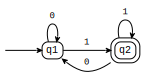

In [4]:
m2 = read_csv('dfa-m2.csv')
m2

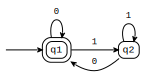

In [5]:
m3 = read_csv('dfa-m3.csv')
m3

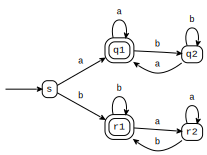

In [6]:
m4 = read_csv('dfa-m4.csv')
m4

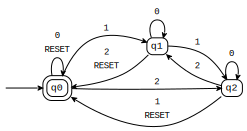

In [7]:
m5 = read_csv('dfa-m5.csv')
m5

**Exercise.** Imagine you're implementing a programming language that only uses the symbols $\{\texttt{a}, \texttt{1}\}$. 

a. As in many other programming languages, a variable name can contain digits but must start with a letter. Write a DFA that accepts only variable names.

b. Our programming language has one reserved word, $\texttt{aa}$. Write a DFA that accepts anything *but* $\texttt{aa}$.

A common shorthand is to relax this to *at most* one transition. Then if the automaton is in state $q$ and the next symbol is $a$ and there is no transition out of $q$ on $a$, the automaton rejects. For each such $q$ and $a$, there is an implicit transition from $q$ on $a$ to a *dead state*. A dead state is a non-accept state whose transitions all self-loop.

### Formal definition

<div class="alert alert-info">
    <b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2b5b826f-d628-41d0-be75-ac00001dd817">W2E2: Complementation</a>.
</div>

To write proofs about DFAs, we need a formal definition both of DFAs and how they work. As we'll use the definition of DFA a lot more, I'll go over that here.

A DFA is a tuple $(Q, \Sigma, \delta, s, F)$. All of the automata and grammars we define are going to be tuples. (If we were programming, we would use a `class` or `struct`, but math only gives us tuples.)

- $Q$ is a finite set of *states*. See [A note on the letter *q*](#A-note-on-the-letter-q) for the notation we use for states.
- $\Sigma$ is a finite alphabet.
- $s \in Q$ is the *start* state (also called the *initial* state).
- $F \subseteq Q$ is the set of *accept* states (also called *final* states).
- $\delta : Q \times \Sigma \rightarrow Q$ (this notation means that $\delta$ is a function that takes two arguments, a state and a symbol, and returns a state) is the *transition function*.

For example, look at $M_2$ again:

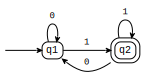

In [8]:
m2

We can write 

\begin{align}
M_2 &= (\{q_1, q_2\}, \{\texttt{0}, \texttt{1}\}, \delta, q_1, \{ q_2 \} ) \\
\delta(q_1, \texttt{0}) &= q_1 \\
\delta(q_1, \texttt{1}) &= q_2 \\
\delta(q_2, \texttt{0}) &= q_1 \\
\delta(q_2, \texttt{1}) &= q_2.
\end{align}

But whenever I ask you to write a DFA, it is always okay to draw a picture instead of writing it like this.

## Complementation

As an example of why the formal definition is useful, let's prove that if a language $L$ is regular, then $\overline{L}$ is also regular. (More explicitly: If $L$ is a language over $\Sigma$, then $\overline{L} = \Sigma^\ast \setminus L$ is also regular.)

A more intuitive proof would go like this: 

> Given a DFA $M$ recognizing $L$, we can construct a DFA $\overline{M}$ by changing all the accept states into non-accept states, and all the (original) non-accept states into accept states. Then $\overline{M}$ recognizes $\overline{L}$; we omit a proof of correctness.

But this proof leaves some things uncertain. First, it's written in an "imperative" style that can become difficult to follow for more complex constructions: after changing all the accept states into non-accept states, all the states are non-accept states, so in the second step, should I change all the states into accept states? The word "(original)" is supposed to clarify, but it's not great. Second, if we use the "implicit dead state" shorthand described above, then following these instructions literally will give an incorrect result.

So a construction based on the formal definition will be more precise. It goes like this:

> Given a DFA $M = (Q, \Sigma, \delta, s, F)$ recognizing $L$, we can construct a DFA $\overline{M} = (Q, \Sigma, \delta, s, Q \setminus F)$. Then $\overline{M}$ recognizes $\overline{L}$; we omit a proof of correctness.

In proofs that involve constructions like this one, it's usually pretty clear that the construction works, and I'm usually okay with you omitting the proof of correctness. If you wanted to add one, it would go like this.

> Then $\overline{M}$ recognizes $\overline{L}$. For if $w \in L$, then $M$, after reading $w$, is in state $q \in F$, so $\overline{M}$, after reading $w$, is also in state $q$, which is not in $Q \setminus F$, so $\overline{M}$ rejects $w$. On the other hand, if $w \not\in L$, then $M$, after reading $w$, is in state $q \not\in F$, so $\overline{M}$, after reading $w$, is also in state $q$, which is in $Q \setminus F$, so $\overline{M}$ accepts $w$.

## The product construction


<div class="alert alert-info">
    <b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0ba5bc72-20d6-41b8-bf8a-ac00012d7fde">W2E3: Intersection</a>.
</div>

Sipser's section "The regular operations" is slightly unusual. These closure properties are important, and where he's going with this is that these closure properties will be used to prove that any regular expression can be compiled into a finite automaton. But using DFAs, this proof is not easy and he gives up halfway. Sipser uses this as a motivation for nondeterminism, which is introduced in the next section. The proof of both Theorem 1.25 and 1.26 will turn out to be very easy.

On the other hand, the proof of Theorem 1.25 has a footnote (3) regarding closure under intersection. This is an important result and the Cartesian product construction *is* the standard way to prove it. I think it deserves more than a footnote, so let's take a closer look at it.

We're given two DFAs, call them $M_A$ and $M_B$, and we want to build a DFA $M$ that recognizes the language $L(M_A) \cap L(M_B)$. That is, $M$ should accept a string if and only if $M_A$ accepts it *and* $M_B$ accepts it.

### By example

Consider the following two DFAs, called $M_A$ and $M_B$. They both accept strings of 1's; $M_A$ accepts the string iff the length is a multiple of 2, and $M_B$ accepts the string iff the length is *not* a multiple of 3.

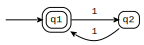

In [9]:
ma = read_csv('dfa-ma.csv')
ma

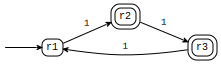

In [10]:
mb = read_csv('dfa-mb.csv')
mb

Their intersection looks like this; it accepts a string iff the length is a multiple of 2 but *not* a multiple of 3.

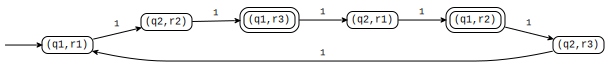

In [11]:
intersect(ma, mb)

Let's see how to build $M$ step by step. Apologies that the following examples are not editable. The basic idea is that $M$ has to simulate what $M_A$ would do and what $M_B$ would do, both at the same time. So the states of $M$ are pairs $(q, r)$, where $q$ is the simulated state of $M_A$ and $r$ is the simulated state of $M_B$. I like to arrange the states in a grid, like this:

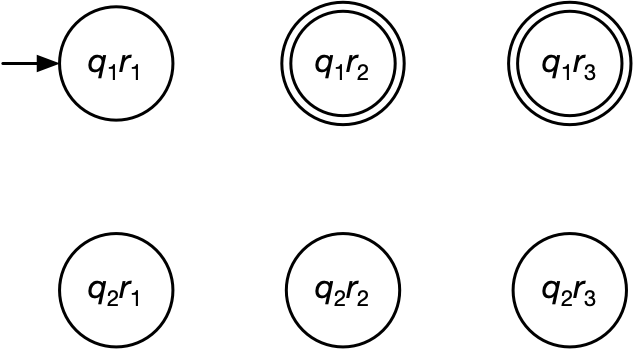

The start state of $M$ is $q_1r_1$, which comes from the start state of $M_A$ and the start state of $M_B$. And the accept states are $q_1r_2$ and $q_1r_3$, which come from the accept states of $M_A$ and the accept states of $M_B$.

If $M$ is in the start state and it reads `1`, then $M_A$ would transition to state $q_2$, and $M_B$ would transition to state $r_2$. So $M$ should transition to state $q_2r_2$:

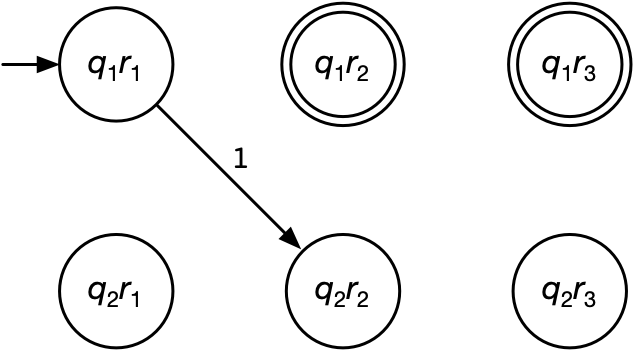

From state $q_2r_2$, on symbol `1`, $M_A$ would transition to state $q_3$ and $M_B$ would transition to state $r_1$, so $M$ should transition to $q_1r_3$:

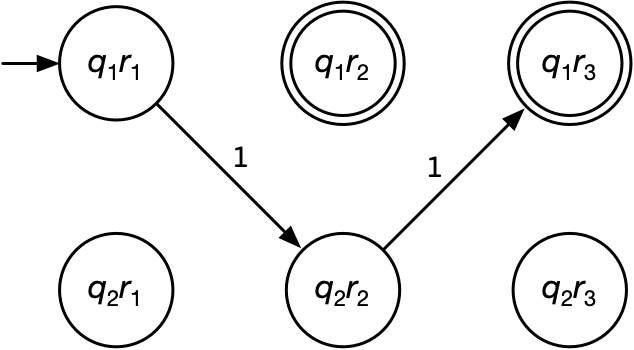

Repeat for all states and all symbols to get the following end result (which is the same as what Tock computed):

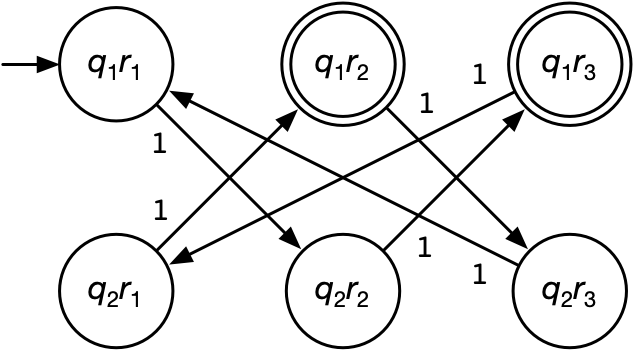

**Exercise.** Combine the starts-with-letter DFA and the no-reserved-word DFA into a single DFA.

### Formal definition

Given two DFAs, $M_A = (Q_A, \Sigma, \delta_A, s_A, F_A)$ and $M_B = (Q_B, \Sigma, \delta_B, s_B, F_B)$, we can construct a DFA $M$ that recognizes $\mathcal{L}(M_A) \cap \mathcal{L}(M_B)$ as follows.

\begin{align}
M &= (Q_A \times Q_B, \Sigma, \delta, (s_A, s_B), F_A \times F_B) \\
\delta((q, r), a) &= (\delta_A(q, a), \delta_B(r, a))
\end{align}

## A note on the letter _q_

We use the letter $q$ to stand for states. This usage goes back at least to Turing; I'm guessing that it may come from physics, where it stands for a "generalized coordinate." But more importantly, there's some fuzziness in the way that this letter is used that I need to call attention to.

With alphabet symbols, the book makes a careful distinction between `a`, a particular symbol, and $a$, a variable standing for a symbol.

With state, the book is not so careful. Particular states are almost always given names $q_1, q_2,$ etc., and occasionally $q_0$ or $q_{\text{whatever}}$ or $r_1, r_2,$ etc., or other names. Variables ranging over states are usually named $q$ or $r$, but not infrequently $q_1, q_2$, etc.

To make this distinction more clear, consider the two statements:

1. In DFA $M_2$ above, $q_1 = q_2$.
2. Let $q_1$ and $q_2$ be states such that there is a transition from $q_1$ to $q_2$ on symbol `a`.

The first statement is false. $q_1$ and $q_2$ refer to particular states, and they are different states.

In the second statement, $q_1$ and $q_2$ are variables ranging over states. Here, it is completely possible for $q_1=q_2$.

This is confusing to be sure. I'll try to use the following conventions, different from the book:

- We'll write $q_1, q_2$, etc. for particular states.
- We'll use $s$ (not $q_0$) for the variable that stands for the start state (i.e., a DFA is a tuple $(Q, \Sigma, \delta, s, F)$).
- We'll use $q$ and $r$ as variables that stand for states.
- We may also (rarely) use $q_i, q_j, q_k$ to stand for states. Technically, this means that we have assigned names $q_1, q_2, \ldots$ to the states, and are using variables $i, j, k$ to stand for state indices.

# Thursday

<div class="alert alert-info">
    <p><b>Read</b> 1.2.</p>
    <p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0874b15f-80f6-4e36-8eeb-ac00012d8007">W2E4: Nondeterministic Finite Automata</a>.</p>
</div>

## Nondeterministic finite automata

A deterministic finite automaton always knows what to do because there is always exactly one possible transition for each state $q$ and symbol $a$. Today, we look at *nondeterministic* finite automata (NFAs), in which there might be more than one possible transition. When this happens, the automaton follows *all* the transitions at once. It's a little like the `fork()` system call, or Padre Pio bilocating. Nondeterminism seems like a weird concept at first, but we will come back to it repeatedly throughout the course.

### By example

Here's an example NFA:

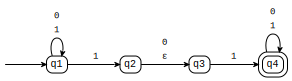

In [12]:
n1 = read_csv('nfa-n1.csv')
to_graph(n1)

There are two differences to note. First, a state can have more than one transition with the same symbol, or no transition with a certain symbol. Second, a transition can be labeled $\varepsilon$, meaning that the NFA can "spontaneously" follow this transition without reading in any input symbols.

Here's an example run, on the string `111`:

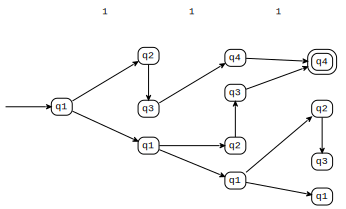

In [13]:
run(n1, "1 1 1")

This graph (basically the same as Figure 1.29 but rotated 90 degrees) shows all the possible branches of computation. At left, we see that the machine starts in state $q_1$. Upon reading the first symbol (`1`), it goes to state $q_1$ *and* $q_2$. Moreover, from state $q_2$, it can go immediately to state $q_3$ without reading any input.

In order for an NFA to accept a string, only one path needs to accept it. In the above example, the NFA accepts the string because at least one branch of computation is in state $q_4$ at the end of the string. The other paths can dead-end, or they can even loop forever.

More example NFAs from the book:

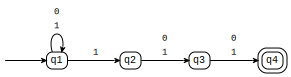

In [14]:
n2 = read_csv('nfa-n2.csv')
n2

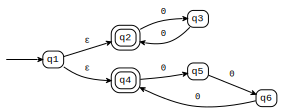

In [15]:
n3 = read_csv('nfa-n3.csv')
n3

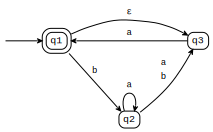

In [16]:
n4 = read_csv('nfa-n4.csv')
n4

**Exercise.** 

a. Write an NFA that recognizes the language $\{u \texttt{000} v \mid u, v \in \{\texttt{0}, \texttt{1}\}^\ast\}$, that is, it accepts all bitstrings containing three zeros.

b. Last time, we saw how, if a DFA recognizes language $L$, then flipping the accept and non-accept states causes it to recognize $\overline{L}$. Do the same thing to your NFA and see what language it recognizes. What happened?

### Formal definition

Let $\Sigma_\varepsilon = \Sigma \cup \{\varepsilon\}$. (It would be more Unixy to write this as $\Sigma^?$ but let's stick with the book's notation.)

An NFA is a tuple $(Q, \Sigma, \delta, s, F)$, where

- $Q$, $\Sigma$, $s$, and $F$ are as in the definition of DFAs.
- $\delta : Q \times \Sigma_\varepsilon \rightarrow \mathcal{P}(Q)$ is the *transition function*.

$\mathcal{P}(Q)$, the *power set* of $Q$, is the set of all subsets of $Q$. So $\delta$ takes two arguments: the first is a state and the second is a symbol or $\varepsilon$. And it returns a set of states.

## Equivalence with DFA

<div class="alert alert-info">
    <b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=06a274fc-55aa-4e28-81fd-ac00012d803a">W2E5: Determinization</a>.
</div>

NFAs seem like they might be a lot more powerful than DFAs, in the sense that they might accept more languages than DFAs do. (Note: the question is not whether NFAs can accept more *strings*, because we can design either a DFA or a NFA that accepts all strings. The question is whether NFAs can accept more *languages*.) Perhaps surprisingly, the answer is no. 

Any NFA can be converted to an equivalent DFA by what is commonly known as the *subset construction*. The idea is that the DFA uses its state to keep track of all the states the NFA is in at any point in time. 

### By example

Recall our example NFA $N_4$:

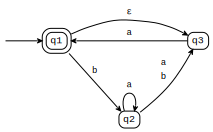

In [17]:
n4

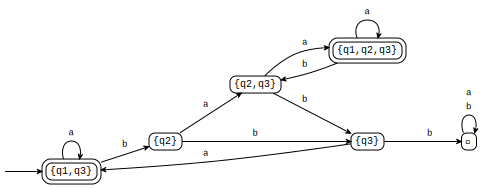

In [18]:
d4 = determinize(n4)
to_graph(d4)

To see how this works, it may be clearer to first run both $N_4$ and its determinized version on an example string. Do you see how they relate to each other?

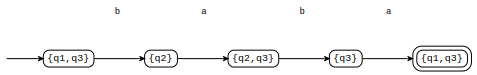

In [19]:
run(d4, "b a b a")

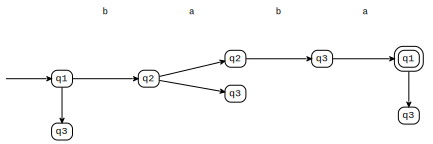

In [20]:
run(n4, "b a b a")

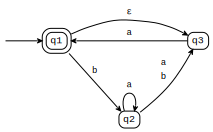

In [21]:
n4

Each state of $D_4$ is a subset of the states of $N_4$. Let's call the states of $D_4$ *state-sets* to help distinguish them from states of $N_4$.

The start state-set of $D_4$ contains $q_1$ because it's the start state of $N_4$, and it also contains $q_3$ because $N_4$ has an $\varepsilon$-transition from $q_1$ to $q_3$. (If $q_3$ had an $\varepsilon$-transition too, we'd follow that, too.)

Next, look at state-set $\{q_1, q_3\}$. What states can be reached from any of these states on symbol $\texttt{a}$? We can reach $q_1$ and (via $\varepsilon$-transitions) $q_3$, so we add a transition from $\{q_1, q_3\}$ to itself.

What states can be reached from $\{q_1, q_3\}$ on symbol $\texttt{b}$? Just $q_2$, so we add a transition from $\{q_1, q_3\}$ to $\{q_2\}$.

Repeat this until every state-set has a transition for every symbol.

The accepting state-sets are those that contain $q_1$.

**Exercise.** 

(a) Determinize your NFA for $\{u \texttt{000} v \mid u, v \in \{\texttt{0}, \texttt{1}\}^\ast\}$ using the above construction. Does the result look like how you'd write a program to search for $\texttt{000}$? 

(b) Think about searching for a more complex pattern like $p = \texttt{001002}$ in a string like $w = \texttt{001001002}$. The simple algorithm would take time $O(|p||w|)$, but there's [a way to do it](https://en.wikipedia.org/wiki/Knuth–Morris–Pratt_algorithm) in time $O(|w|)$. How would you do it using automata?

### Formal definition

The book wisely defines the construction assuming no $\varepsilon$-transitions first. Given a NFA $N = (Q, \Sigma, \delta, s, F)$ without $\varepsilon$-transitions, we can construct a DFA $M$ that recognizes $\mathcal{L}(N)$ as follows:

\begin{align}
M &= (\mathcal{P}(Q), \Sigma, \delta', \{s\}, F') \\
F' &= \{ \bar{q} \subseteq Q \mid \bar{q} \cap F \neq \emptyset \}.
\end{align}

The book defines $\delta'$ concisely but it's not the easiest to read. I tend to prefer a wordier definition: For every state-set $\bar{q} \subseteq Q$ and symbol $a \in \Sigma$, let $\delta'(\bar{q}, a) = \bar{r}$, where $\bar{r}$ is defined as follows: for every $q \in \bar{q}$, add all the states in $\delta(q, a)$ into $\bar{r}$.

Now the general case: Given a NFA $N = (Q, \Sigma, \delta, s, F)$, we can construct a DFA $M$ that recognizes $\mathcal{L}(N)$ as follows. If $\bar{q}$ is a set of states, define $E(\bar{q})$, the $\varepsilon$-closure of $\bar{q}$, to be the set of states reachable from a state in $\bar{q}$ via 0 or more $\varepsilon$-transitions. More formally,
- $\bar{q} \subseteq E(\bar{q})$.
- If $q \in E(\bar{q})$, then $\delta(q, \varepsilon) \subseteq E(\bar{q})$.

Then we can construct
\begin{align}
M &= (\mathcal{P}(Q), \Sigma, \delta', E(\{s\}), F') \\
F' &= \{ \bar{q} \subseteq Q \mid \bar{q} \cap F \neq \emptyset \}.
\end{align}
For every state-set $\bar{q} \subseteq Q$ and symbol $a \in \Sigma$, let $\delta'(\bar{q}, a) = \bar{r}$, where $\bar{r}$ is defined as follows: for every $q \in \bar{q}$, add all the states in $E(\delta(q, a))$ into $\bar{r}$.

### Finite automata and neural networks (optional)

<p class="alert alert-info"><b>Read</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Sessions/List.aspx?folderID=d00d3e39-4e79-4461-b083-abff0173ce54">W2E6: Neural Networks</a></p>

As mentioned above, finite automata have a common origin with neural networks, which were introduced in 1943 and were later applied to artificial intelligence. Their popularity rose and fell several times but are currently very much in vogue.

I'd like to present a variant of the original neural networks, designed to highlight their similarity with finite automata. We can picture a neural network (NN) as a graph, like this:

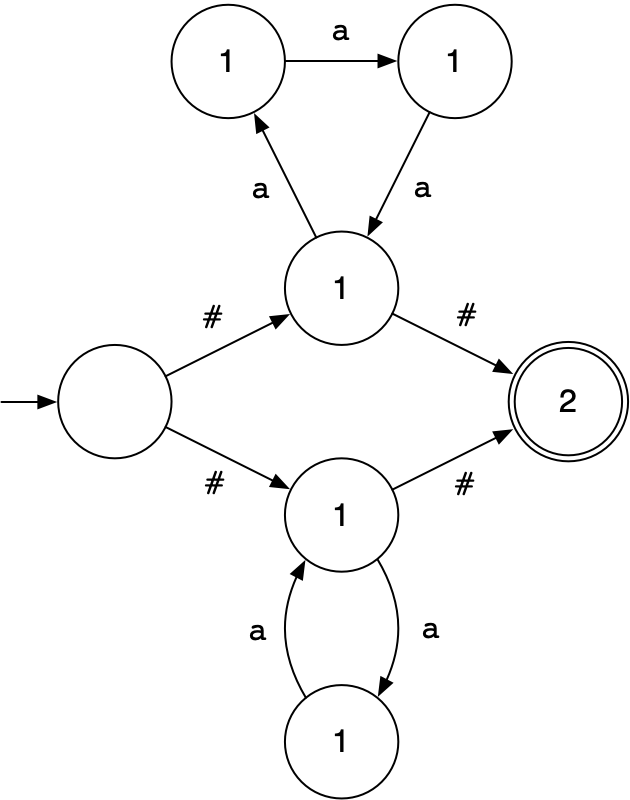

If it were not for the numbers inside the states, this would look like an NFA recognizing the language $\{\#\texttt{a}^n\# \mid \text{$n$ is a multiple of 2 or 3}\}$. At any time while reading $\texttt{a}$'s, exactly one state in the 2-cycle and exactly one state in the 3-cycle is "on"; the rest are "off." (Note the shift in terminology: we used to say that a machine is "in" a state, but now we say that the state is "on." The meaning is the same, but the "on/off" terminology will make what comes next clearer.) Now imagine that the machine reads $\#$. If either of the predecessors of the accept state were on, then the accept state will be on. So, as an NFA, this machine would accept strings where the number of $\texttt{a}$'s is either a multiple of 2 or 3.

But the number inside each state is important. It is an *activation threshold* which says how many incoming transitions are needed to turn the state on. In this case, the accept state has a threshold of 2, meaning that, on reading $\#$, both of the accept state's predecessors must have been on in order for the accept state to be on. In other words, the number of $\texttt{a}$'s must be a multiple of 2 *and* a multiple of 3.

We do allow there to be more than one transition from state $q$ on input $a$ to state $r$. For NFAs, this would make no difference, but for neural networks it does make a difference.

Now consider this NN:
    
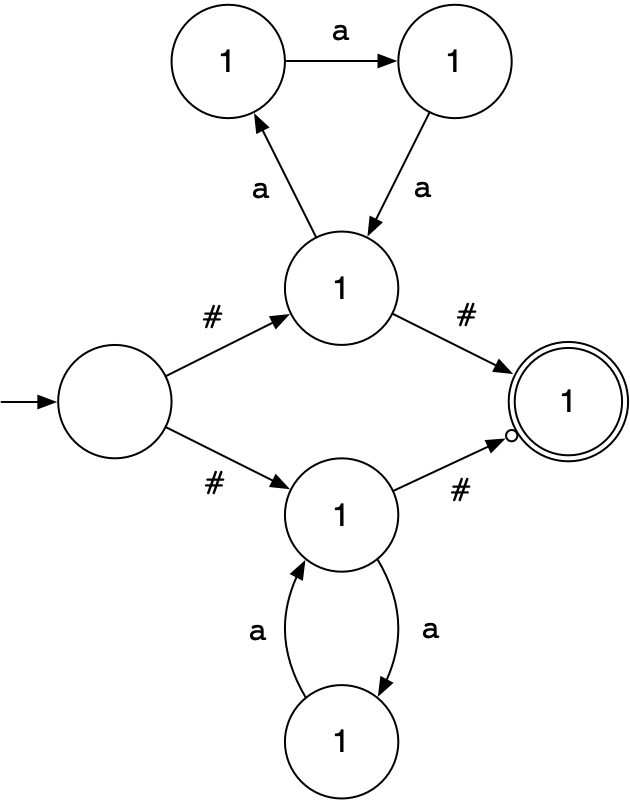

The transition that ends with a little circle is called *inhibitory*. If there's an inhibitory transition from state $q$ on symbol $a$ to state $r$, and state $q$ was on before reading $a$, then state $r$ cannot be on afterwards. So this NN accepts if the number of $\texttt{a}$'s is a multiple of 2 but *not* a multiple of 3.

The subset construction for converting an NFA to a DFA can be generalized to work on a neural network. The DFA states are still subsets of the states of the NN, and the DFA's start and accept states are the same; but the transition function is modified: let $\delta(\bar{q}, a)$ be the set of states that would be on if the states in $\bar{q}$ were on and the NN reads $a$.

Now imagine that we have a collection of strings that we want the NN to learn from. Some of the strings should be accepted and the rest should be rejected. We run the NN on all the strings and count the number of mistakes. We then want to modify the NN to minimize the number of mistakes.

To do this (and now we are definitely leaving Theory of Computing and entering Machine Learning), we replace all the integers with real numbers:

- For a state $q$, symbol $a$, and state $r$, the number of transitions from $q$ on $a$ to $r$ doesn't have to be a natural number; it can be any real number, positive or negative, called the *weight* of the transition.
- We don't need inhibitory transitions anymore, because we can simulate one with a transition with weight $-\infty$.
- The activation threshold can be any real number.
- A state is no longer just "on" or "off"; it has an *activation* between 0 (off) and 1 (on). Let's write the activation of state $q$ at time $i$ as $\text{activation}^{(i)}(q)$. Then
\begin{align*}
\text{activation}^{(i+1)}(r) &= \sigma\left(\sum_q \text{activation}^{(i)}(q) \times \text{weight}\left(q \xrightarrow{a} r\right) - \text{threshold}(r)\right) \\
\sigma(x) &= \frac{1}{1 + e^{-x}}
\end{align*}
where $\sigma$ is a smooth version of the "$\geq 0$" function that looks like this:
![Sigmoid function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png)

Finally, the number of mistakes is no longer a natural number, but, for each example string, it's the absolute difference between the correct answer (0 or 1) and the activation of the accept state. This is a continuous function of the weights and thresholds, and we can use calculus to minimize the number of mistakes by adjusting the weights and thresholds.